<h3> Workshop on Principal Component Analysis </h3>
<h4> Course: Problem Solving using Pattern Recognition (PSUPR)<br>
Written by Sudalaiandi Raja Sudalaimuthu on 11th July 2019</h4><br>
Modeled after Program written by Charles Pang 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
#Load the data from the file

data = pd.read_csv('restaurant.csv')

<b><u> Perform Data Cleanup :</u></b> 
<h7><br><b> Drop unwanted columns </b></h7>
<ul>
    <li> _id - id is an internal system generated field value and has no relevance to the problem</li>
    <li> address - address information is not required for the problem assessment</li>
    <li> cuisine - not relevant to the problem assessment</li>
    <li> label - has only one value for all the records and not impacting the problem assessment </li>
    <li> phone - Phone number does not have any significance to target</li>
    <li> region - multiple values in this column is not impacting the target</li>
    <li> restaurantLink - Website link does not impact target</li>
    <li> restaurantName - is irrelevant to the problem</li>
</ul>
    
<b> Data correction steps :</b>
<ul>
    <li>ranking - retain only the digit portion of ranking</li>
    <li>openMeal - split the values as columns using One Hot Encoding method</li>
</ul>

In [3]:
print('Shape of data under analysis : ', data.shape, '\nNumber of Features : ', len(data.columns))

# Drop unwatned columns from the dataframe

data = data.drop(['_id', 'address', 'cuisine', 'label', 'phone', 'region', 'restauranLink', 'restaurantName', 'totalPageNumber'], axis=1)

Shape of data under analysis :  (1230, 28) 
Number of Features :  28


In [4]:
#One Hot Encoding using get_dummies for openMeal column

data['openMeal'] = data['openMeal'].str.replace(' ','')     #Remove white spaces

data = data.join(data.openMeal.str.get_dummies(sep=','))   #One hot encoding

data = data.drop(['openMeal'], axis=1)    # Drop the column after one hot encoding

In [5]:
#Retain only the digit portion of ranking in 'ranking' column
columns = ['ranking', 'ratingAverage', 'ratingExcellent', 'ratingPoor', 'ratingTerrible', 'ratingVeryGood']

for col in columns : 
    data[col] = data[col].str.extract('(\d+)', expand=False)  # Retain only the digit portion


In [6]:

# Label Encoding of ratingAndPopularity column

# Retain only $- and strip off the rest
data['ratingAndPopularity'] = data.ratingAndPopularity.astype(str).str.replace('[^$-]','')

rating_map = {"ratingAndPopularity" : {"$":1, "$$":2, "$$$":3, "$$$$":4, "$$$$$":5, 
                                       "$-$$":1.5, "$$-$$$":2.5, "$$$-$$$$":3.5, "$$$$-$$$$$":4.5,
                                       "":0
                                      }
             }
data.replace(rating_map, inplace=True)


In [7]:
# Populate NaN / None values with mean value of respective columns

data = data.fillna(data.mean())

In [8]:
# Remove all non-numeric characters in the dataframe - Final step of Data pre-processing (cleanup)

print('Before replacing non-numeric characters : \n',data.head())

for col in data.columns :
    data[col] = pd.to_numeric(data[col].astype(str).str.replace('[^0-9.]',''))
    

Before replacing non-numeric characters : 
    Atmosphere  Food  Service  Value numbeOfReviews  numberAverage  \
0    4.500000   4.5      4.5    4.0            802            350   
1    4.500000   4.5      4.5    4.0            341            327   
2    4.000000   4.5      4.0    4.5            459            334   
3    4.500000   4.5      4.5    4.0            450            335   
4    3.937385   4.0      4.5    4.5             83             32   

   numberExcellent  numberPoor  numberTerrible  numberVeryGood  ...  \
0             1444         419              59            2249  ...   
1             1176          49              54             297  ...   
2             1231         413              55            2130  ...   
3             1230         413             510            2137  ...   
4              169          40              50              25  ...   

  ratingPoor  ratingTerrible ratingValue ratingVeryGood After-hours Breakfast  \
0          2               1     

In [9]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

# Just make a convenience function; this one wraps the VarianceThreshold
# transformer but you can pass it a pandas dataframe and get one in return

def get_low_variance_columns(dframe=None, thresh=0.0,
                             autoremove=False):
    """
    Wrapper for sklearn VarianceThreshold for use on pandas dataframes.
    """
    print("Finding low-variance features.")
    try:
        # get list of all the original df columns
        all_columns = dframe.columns

        # get length of new index
        max_index = len(all_columns) - 1

        # get dataframe values
        X = dframe.loc[:, all_columns].values

        # instantiate VarianceThreshold object
        vt = VarianceThreshold(threshold=thresh)

        # fit vt to data
        vt.fit(X)

        # get the indices of the features that are being kept
        feature_indices = vt.get_support(indices=True)

        # remove low-variance columns from index
        feature_names = [all_columns[idx]
                         for idx, _
                         in enumerate(all_columns)
                         if idx
                         in feature_indices]

        # get the columns to be removed
        removed_features = list(np.setdiff1d(all_columns,
                                             feature_names))
        print("Found {0} low-variance columns."
              .format(len(removed_features)))

        # remove the columns
        if autoremove:
            print("Removing low-variance features.")
            # remove the low-variance columns
            X_removed = vt.transform(X)

            print("Reassembling the dataframe (with low-variance "
                  "features removed).")
            # re-assemble the dataframe
            dframe = pd.DataFrame(data=X_removed,
                                  columns=feature_names)

            print("Succesfully removed low-variance columns.")

        # do not remove columns
        else:
            print("No changes have been made to the dataframe.")

    except Exception as e:
        print(e)
        print("Could not remove low-variance features. Something "
              "went wrong.")
        pass

    return dframe, removed_features

In [10]:
# Remove Features with low variable of having same values for more than 80% of samples

data, low_variance_features_removed = get_low_variance_columns (dframe=data, thresh=(0.8*(1-0.8)), autoremove=True)

print (f'\nLow variance features removed with the threshold ({0.8*(1-0.8):0.3f}): \n', low_variance_features_removed)

Finding low-variance features.
Found 7 low-variance columns.
Removing low-variance features.
Reassembling the dataframe (with low-variance features removed).
Succesfully removed low-variance columns.

Low variance features removed with the threshold (0.160): 
 ['Dinner', 'Drinks', 'Food', 'Lunch', 'Service', 'Value', 'ratingValue']


In [11]:
# (1) Generate Summary Statistics
print("-----------------------")
print("Data Dimensions:  ", data.shape)

sumry = data.describe().transpose()
print("Summary Statistics:\n",sumry,'\n')

-----------------------
Data Dimensions:   (1230, 17)
Summary Statistics:
                       count        mean         std   min     25%    50%  \
Atmosphere           1230.0    3.937385    0.428579   2.0    3.50    4.0   
numbeOfReviews       1230.0  162.300813  236.338886   7.0   51.00   92.0   
numberAverage        1230.0  263.300000  465.094208  30.0   34.00  311.0   
numberExcellent      1230.0  282.817073  493.561008  10.0  116.00  130.0   
numberPoor           1230.0  130.705691  250.819956  40.0   41.00   43.0   
numberTerrible       1230.0  125.634146  219.457841  50.0   50.00   52.0   
numberVeryGood       1230.0  437.152846  635.540161  21.0  217.00  233.0   
ranking              1230.0  406.880488  326.313925   1.0   77.25  385.0   
ratingAndPopularity  1230.0    2.485772    0.817825   0.0    2.50    2.5   
ratingAverage        1230.0   13.021138    6.405059   0.0    8.00   13.0   
ratingExcellent      1230.0   41.327642   15.338782   6.0   29.00   39.0   
ratingPoor   

Frequency Distributions:


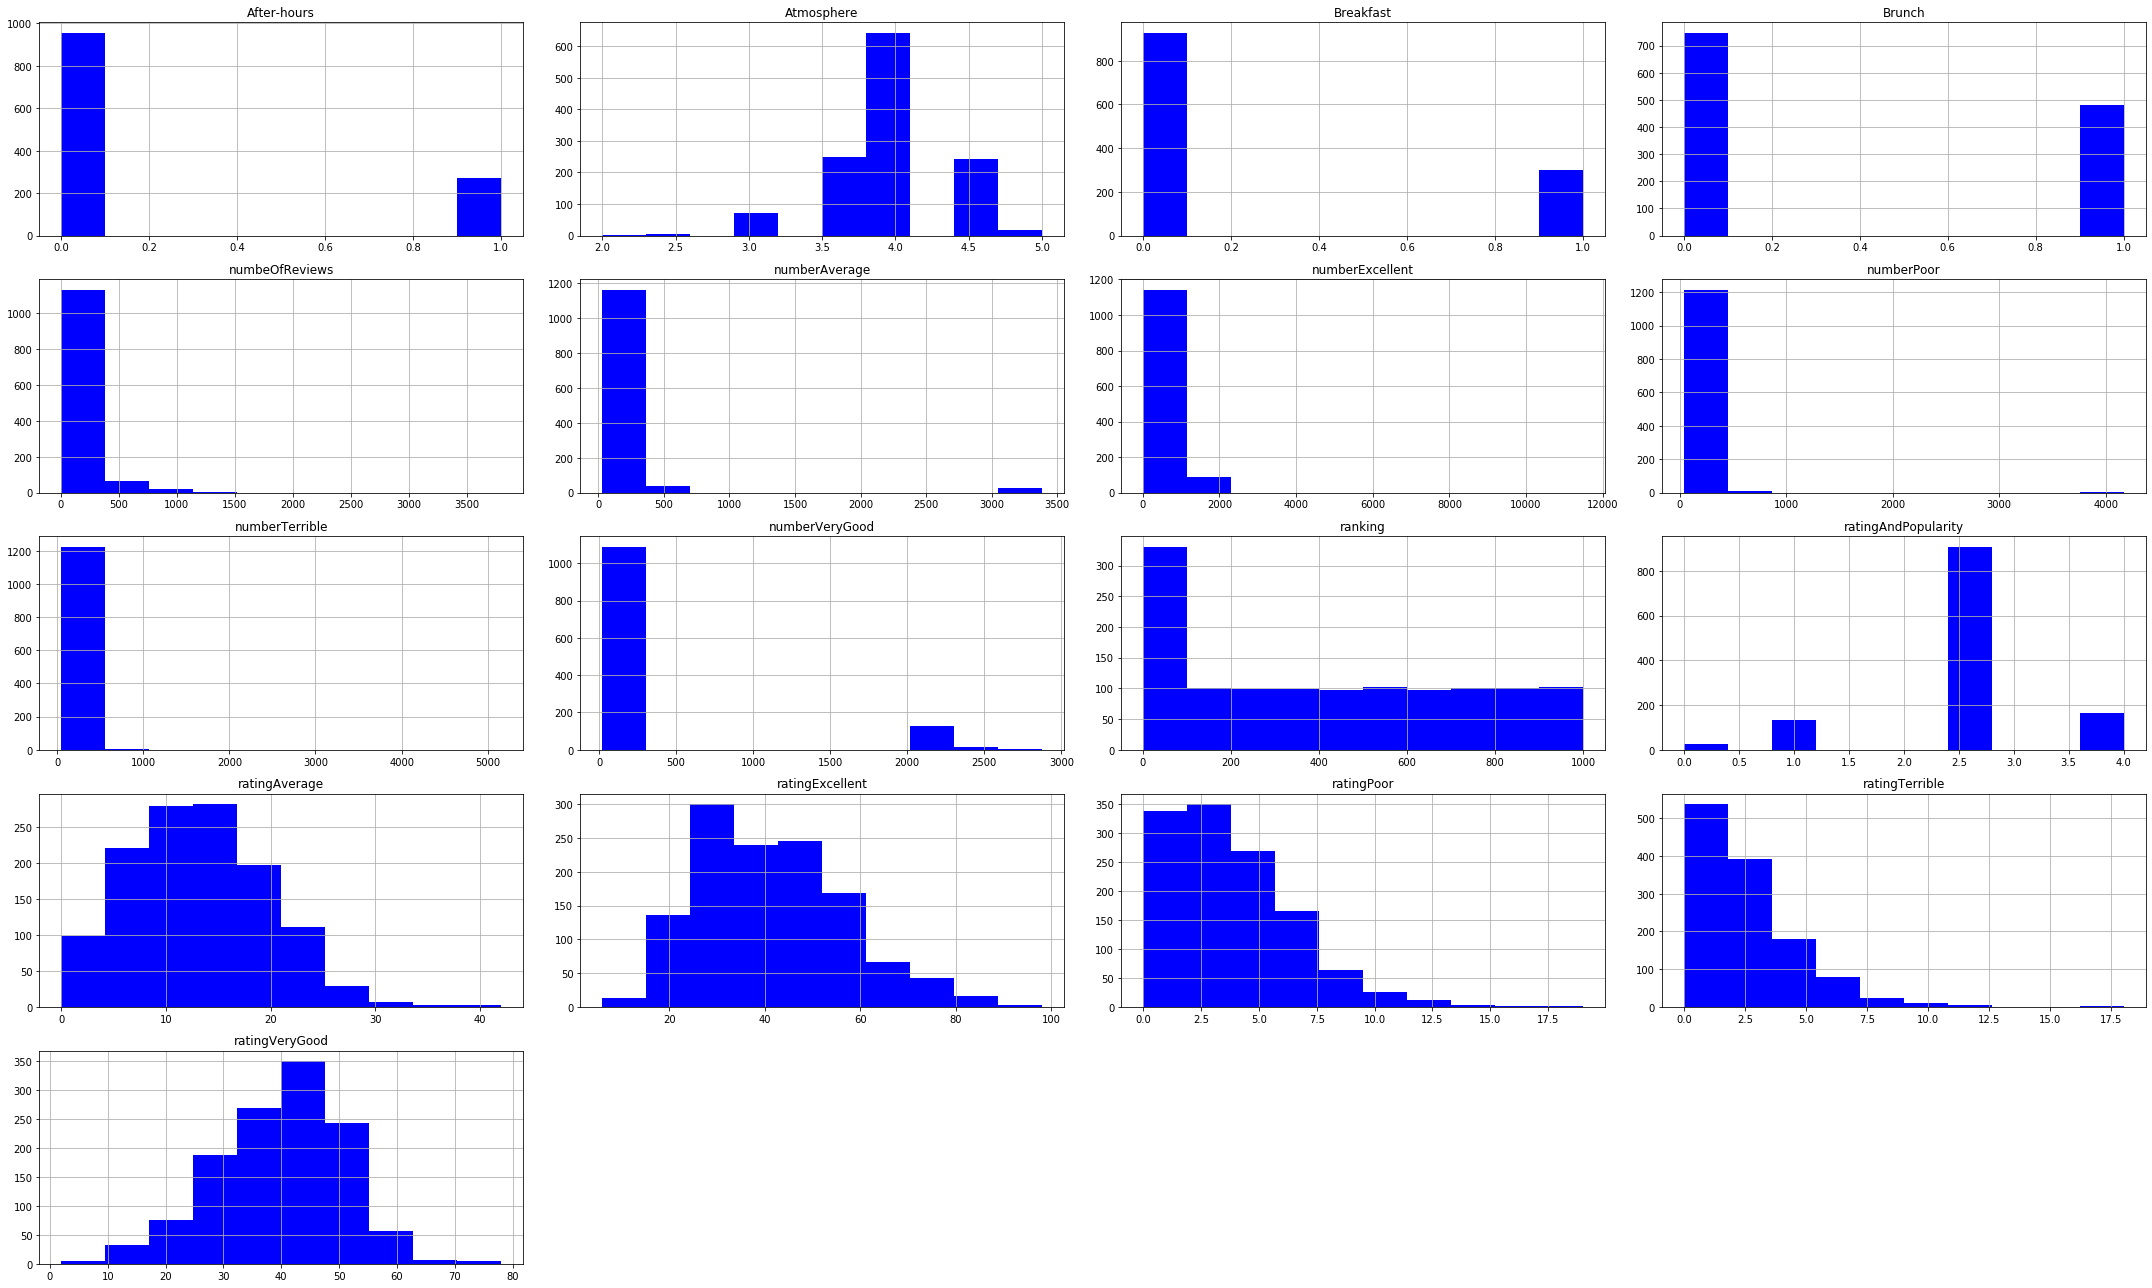

In [12]:
# (2) Histograms Visualisation
print("Frequency Distributions:")
data.hist(grid=True, figsize=(30,18), color='blue')
plt.tight_layout()
plt.show()


In [13]:
# (3) correlation matrix (before stdze)
corm = data.corr().values
print('Corelation Matrix:\n',data.corr())


Corelation Matrix:
                      Atmosphere  numbeOfReviews  numberAverage  \
Atmosphere             1.000000        0.031697      -0.008055   
numbeOfReviews         0.031697        1.000000       0.743810   
numberAverage         -0.008055        0.743810       1.000000   
numberExcellent        0.136843        0.802639       0.498441   
numberPoor            -0.006717        0.733461       0.516554   
numberTerrible        -0.004850        0.705041       0.467579   
numberVeryGood         0.007221        0.734561       0.552124   
ranking                0.011271       -0.218870      -0.132751   
ratingAndPopularity    0.284454        0.124920       0.088968   
ratingAverage         -0.283130        0.071405       0.218844   
ratingExcellent        0.388988       -0.046407      -0.163153   
ratingPoor            -0.126818        0.183806       0.237191   
ratingTerrible        -0.153295        0.177846       0.200918   
ratingVeryGood        -0.314810       -0.060700      -0.

### Correlation determination for feature selection

In [14]:
import seaborn as sns

def get_high_correlation_features (dframe, 
                                   threshold=0.9, 
                                   autoremove=False) :
    '''
    Returns dframe and list of selected correlated feature identified for removal based on threshold
    '''
    corr = dframe.corr(method='pearson')

    plt.figure(figsize=(15,15))
    plt.suptitle('Correlation Matrix', fontsize=16)
    sns.heatmap(corr, cmap=plt.cm.Blues, linewidths=0.2, annot=True)
    
    columns = np.full((corr.shape[0],), True, dtype=bool)
    
    print (f'Corrleated Features based on threshold of {threshold} using Pearson Correlation method : ')
    
    for i in range(corr.shape[0]):
        for j in range(i+1, corr.shape[0]):
            if abs(corr.iloc[i,j]) >= threshold :
                print (f'{[dframe.columns[i], dframe.columns[j]]} Correlation Co-efficient : {corr.iloc[i,j]:0.3f}')
                if columns[j]:
                    columns[j] = False
                    
    selected_columns = dframe.columns[columns]
    print (f'\nFeatures identified for removal based on pearson correlation co-efficient more than {threshold} threshold : ', 
           (columns == False).sum(), '\n', list(dframe.columns[~columns]))
    
    if autoremove :
        dframe = dframe[selected_columns]
        print ('\nSuccessfully removed features based on correlation matrix. ')
    else :
        print ('Features not removed automatically. ')
    
    
    return dframe, selected_columns

Corrleated Features based on threshold of 0.8 using Pearson Correlation method : 
['numbeOfReviews', 'numberExcellent'] Correlation Co-efficient : 0.803
['ratingExcellent', 'ratingVeryGood'] Correlation Co-efficient : -0.830

Features identified for removal based on pearson correlation co-efficient more than 0.8 threshold :  2 
 ['numberExcellent', 'ratingVeryGood']

Successfully removed features based on correlation matrix. 


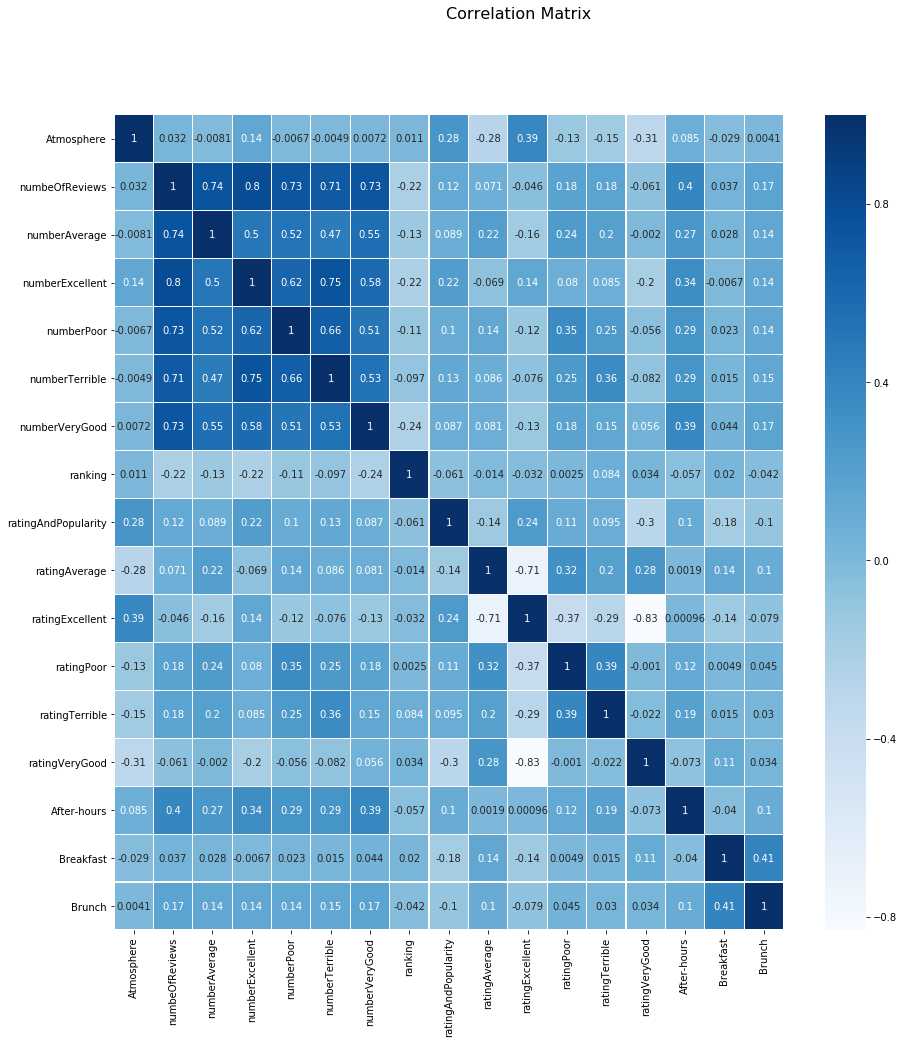

In [15]:
data, _ = get_high_correlation_features (data, threshold=0.8, autoremove=True)

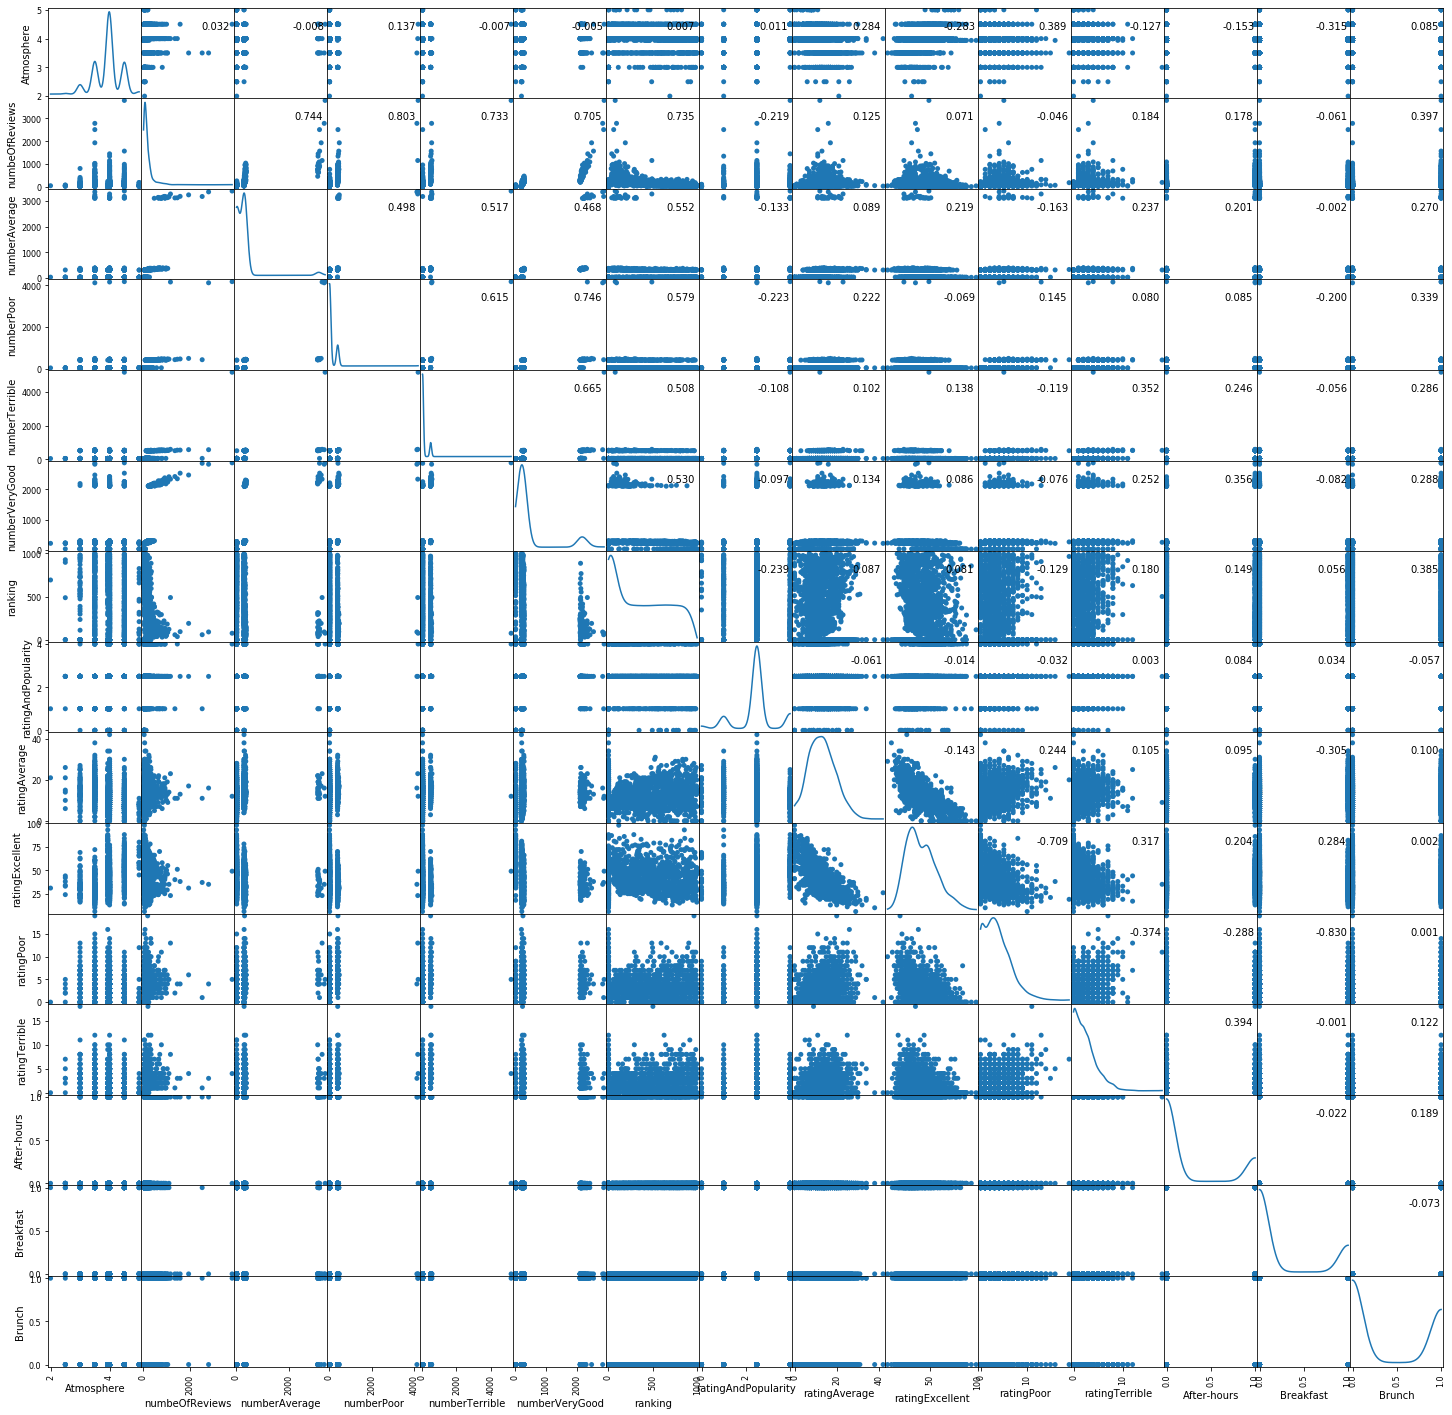

In [16]:
# (4) Correlation scatter plots (very messy for huge features)
axes = pd.plotting.scatter_matrix(data, alpha=1.0, figsize=(25,25), diagonal='kde', s=100)
# s=dot size
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corm[i,j], (0.8, 0.8), 
                        xycoords='axes fraction', ha='center', va='center')
plt.show()


In [17]:
# (5) STANDARDIZE data; mean=0;sd=1
data_std = StandardScaler().fit_transform(data)


In [18]:
features = list(data)
colnames = np.transpose(features)

In [19]:
# (6) Apply PCA. Get Eigenvctors, Eigenvalues
# Loadings = Correlation coefficient betwn PC & feature 
n_components = len(features)
pca = PCA(n_components).fit(data_std)

# generate PC labels:
PCs=[]
for l in range(1,n_components+1):
    PCs.append("PC"+str(l))
    
# Get Eigenvectors & Eigenvalues
eigvec = pca.components_.transpose()
eigval = pca.explained_variance_
    
#eigval, eigvec = np.linalg.eig(corm)   

# Calculate Loadings = Eigenvector * SQRT(Eigenvalue)
print('Loading Matrix:'); loadings= np.sqrt(eigval)*eigvec
print(pd.DataFrame(loadings,columns=PCs,index=colnames),'\n')


Loading Matrix:
                          PC1       PC2       PC3       PC4       PC5  \
Atmosphere          -0.076446  0.596514  0.044119 -0.361383 -0.282454   
numbeOfReviews       0.881519  0.275139  0.119511  0.139835  0.100791   
numberAverage        0.759269  0.078015  0.051926  0.136925  0.014941   
numberPoor           0.800104  0.115613 -0.033727 -0.017402  0.096576   
numberTerrible       0.781998  0.158386 -0.046097 -0.079637  0.158678   
numberVeryGood       0.763930  0.193769  0.143238  0.191586  0.024853   
ranking             -0.205064 -0.169262 -0.171097 -0.571427  0.596550   
ratingAndPopularity  0.127571  0.455016 -0.410668 -0.291617 -0.505989   
ratingAverage        0.307834 -0.731427 -0.049028  0.098805 -0.246341   
ratingExcellent     -0.305318  0.813663  0.082704 -0.100404  0.100165   
ratingPoor           0.458106 -0.363962 -0.382381 -0.259368 -0.261302   
ratingTerrible       0.427208 -0.289576 -0.395689 -0.400876  0.072475   
After-hours          0.473675  0.22

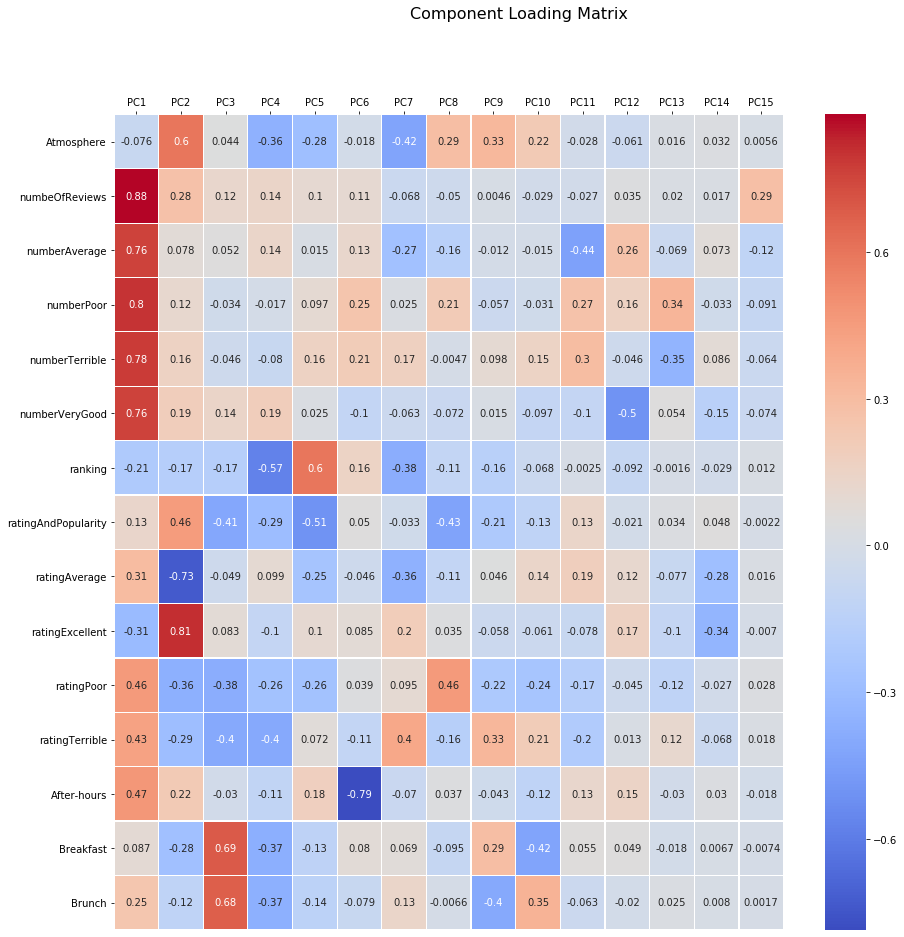

In [21]:
plt.figure(figsize=(15,15))
plt.suptitle('Component Loading Matrix', fontsize=16)
lm = sns.heatmap(loadings, cmap='coolwarm', linewidths=0.2, annot=True)
lm.set_yticklabels(colnames,rotation=0)
lm.set_xticklabels(PCs)
lm.xaxis.set_ticks_position('top')
plt.show()

### Below are the interpretation of Principal Components

<b> PC1 - </b> Represents Rating related Features (Average, Poor, Terible, etc.) <br>
<b> PC2 - </b> Represents Atmosphere, RatingExcellent, RatingAverage <br>
<b> PC3 - </b> Represents RatingAndPopulatiry, Breakfast, Brunch <br>
<b> PC4 - </b> Represents Ranking and RatingTerrible <br>
<b> PC5 - </b> Represents Ranking and RatingAndPopularity <br> 
<b> PC6 - </b> Represents After-hours <br>
<b> PC7 - </b> Represents Atmosphere, Rating and RatingAverage <br>
<b> PC8 - </b> Represents RatingAndPopularity and RatingPoor <br>


In [22]:
# (7) Print out Eigenvectors
print('\nEigenvectors (Linear Coefficients):')
print(pd.DataFrame(eigvec,columns=PCs,index=colnames),'\n')

var_expln= pca.explained_variance_ratio_ * 100
eigval = -np.sort(-eigval) #descending
npc = 10 # display-1
print("Eigenvalues   :",eigval[0:npc])
print("%Explained_Var:",var_expln[0:npc])
print("%Cumulative   :",np.cumsum(var_expln[0:npc]))
print('\n')



Eigenvectors (Linear Coefficients):
                          PC1       PC2       PC3       PC4       PC5  \
Atmosphere          -0.037629  0.393097  0.036205 -0.335839 -0.289641   
numbeOfReviews       0.433914  0.181314  0.098073  0.129951  0.103355   
numberAverage        0.373738  0.051411  0.042611  0.127246  0.015321   
numberPoor           0.393838  0.076188 -0.027677 -0.016172  0.099033   
numberTerrible       0.384926  0.104375 -0.037828 -0.074008  0.162715   
numberVeryGood       0.376032  0.127692  0.117544  0.178044  0.025486   
ranking             -0.100940 -0.111542 -0.140405 -0.531037  0.611728   
ratingAndPopularity  0.062795  0.299851 -0.337002 -0.271005 -0.518862   
ratingAverage        0.151526 -0.482003 -0.040233  0.091822 -0.252608   
ratingExcellent     -0.150288  0.536195  0.067868 -0.093307  0.102714   
ratingPoor           0.225495 -0.239847 -0.313788 -0.241036 -0.267951   
ratingTerrible       0.210286 -0.190828 -0.324709 -0.372541  0.074318   
After-hours   

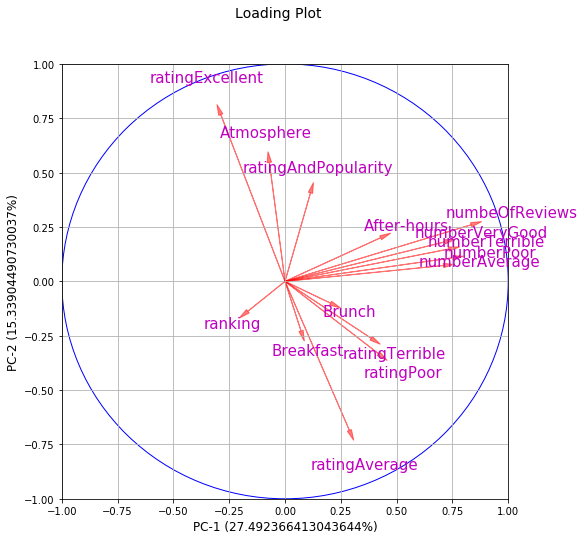

In [23]:
# (8) Loadings Plot
coeff = loadings[:,0:2]
fig = plt.figure(figsize=(8,8))
plt.xlim(-1,1)
plt.ylim(-1,1)
fig.suptitle('Loading Plot',fontsize=14)
plt.xlabel('PC-1 ('+str(var_expln[0])+'%)',fontsize=12)
plt.ylabel('PC-2 ('+str(var_expln[1])+'%)',fontsize=12)

for i in range(len(coeff[:,0])):
    plt.arrow(0,0,coeff[i,0],coeff[i,1],color='r',
              alpha=0.5,head_width=0.02, head_length=0.05,length_includes_head=True)
    plt.text(coeff[i,0]*1.15,coeff[i,1]*1.15,features[i],fontsize=15,
             color='m',ha='center',va='center')

circle = plt.Circle((0, 0), 0.9999999,  color='b', fill=False)
ax = fig.gca(); ax.add_artist(circle)
plt.grid(); plt.show()


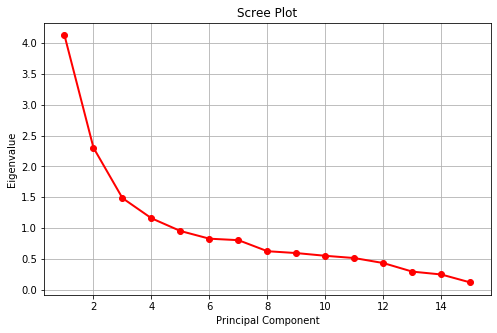

In [24]:
## (9) scree plot
num_vars= len(features)
fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(num_vars) + 1

plt.plot(sing_vals, eigval, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid(); plt.show()


	1. Data cleaning, missing values
	2. Dropping of features - provide reason why
	3. Selection of # of components - use 3 criteria, explain why
	4. Interpretation of selected components



<b> Based on Scree Plot, there is a bend at PC8.<br>
Upto PC8, the cumulative variance is 81%. Information loss is 19%.</b>



<b> Data correction steps :</b>
<ul>
    <li>ranking - retain only the digit portion of ranking</li>
    <li>Retain only digit portion in Ratings related features</li>
    <li>openMeal - split the values as columns using One Hot Encoding method</li>
    <li>Populate missing values with mean value</li>
    <li>Type casting to numeric</li>
</ul>

<h7><br><b> Drop unwanted columns </b></h7>
<ul>
    <li> _id - id is an internal system generated field value and has no relevance to the problem</li>
    <li> address - address information is not required for the problem assessment</li>
    <li> cuisine - not relevant to the problem assessment</li>
    <li> label - has only one value for all the records and not impacting the problem assessment </li>
    <li> phone - Phone number does not have any significance to target</li>
    <li> region - multiple values in this column is not impacting the target</li>
    <li> restaurantLink - Website link does not impact target</li>
    <li> restaurantName - is irrelevant to the problem</li>
</ul>

<h7><br><b> Selection of Features </b></h7>
<ul>
    <li><b>Low variance</b> features removed with the threshold (0.160) : 
    <ul>
        <li> ['Dinner', 'Drinks', 'Food', 'Lunch', 'Service', 'Value', 'ratingValue']</li>
        </ul> </li>
    <li>Features identified for removal based on <b>pearson correlation</b> co-efficient more than 0.8 threshold :  2 </li>
    <ul> <li> ['numberExcellent', 'ratingVeryGood'] </li> </ul>
</ul>

<h7><br><b> Component Selection </b></h7>
<ul>
    <li>PC1-PC9 has <b>cumulative variance</b> of 85.7%. Recommendation is to select <b>PC1-PC9</b> </li>
    <ul><li>%Cumulative   : [27.49236641 42.83141132 52.72317792 60.43623825 66.77104026 72.27442743 <br>
        77.61922604 81.76939882 85.7178405  89.37200576] </li></ul>
    <li>Based on <b>Scree Plot</b>, there is a bend at PC8. Recommendation is to select <b>PC1-PC8</b>. 
        <br> This would have information coverage of 81.8% </li>
</ul>


<h7><b> Below are the interpretation of selected Principal Components </b></h7>
<ul>
    <li><b> PC1 - </b> Represents Rating related Features (Average, Poor, Terible, etc.) </li>
    <li><b> PC2 - </b> Represents Atmosphere, RatingExcellent, RatingAverage </li>
    <li><b> PC3 - </b> Represents RatingAndPopulatiry, Breakfast, Brunch </li>
    <li><b> PC4 - </b> Represents Ranking and RatingTerrible </li>
    <li><b> PC5 - </b> Represents Ranking and RatingAndPopularity </li> 
    <li><b> PC6 - </b> Represents After-hours </li>
    <li><b> PC7 - </b> Represents Atmosphere, Rating and RatingAverage </li>
    <li><b> PC8 - </b> Represents RatingAndPopularity and RatingPoor </li>
</ul>
